In [1]:
import pandas
import scipy.io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import skimage

In [3]:
im = plt.imread("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img1/img1.bmp")
m1 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img1/img1_fibroblast.mat")
m2 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img1/img1_epithelial.mat")
m3 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img1/img1_inflammatory.mat")
m4 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img1/img1_others.mat")

n = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Detection/img1/img1_detection.mat")


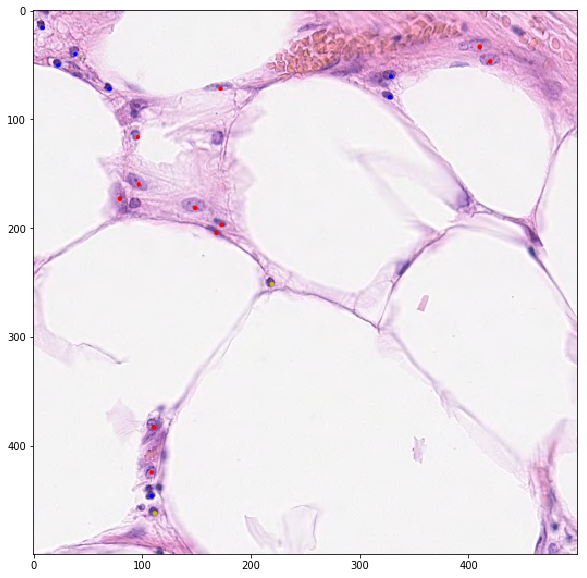

In [4]:
plt.figure(figsize=(10,10))
implot = plt.imshow(im)

plt.scatter(x=m1["detection"][:,0], y=m1["detection"][:,1], c='r', s=20, edgecolors='')
plt.scatter(x=m2["detection"][:,0], y=m2["detection"][:,1], c='g', s=20, edgecolors='')
plt.scatter(x=m3["detection"][:,0], y=m3["detection"][:,1], c='b', s=20, edgecolors='')
plt.scatter(x=m4["detection"][:,0], y=m4["detection"][:,1], c='y', s=20, edgecolors='')
plt.show()

# Extracing patches

In [48]:
def extract_patch(im, pos, window_size=(52,52)):
    x1 = int(pos[0]-patch_size/2)
    x2 = int(pos[0]+patch_size/2)
    y1 = int(pos[1]-patch_size/2)
    y2 = int(pos[1]+patch_size/2)
#     im_patch = im[y1:y2, x1:x2, :]
    im_patch = skimage.util.crop(ar=im, crop_width=((y1,y2), (x1,x2)), copy=True)
    return im_patch


In [49]:
patch_size = 50
pos = m4["detection"][0]
im_patch = extract_patch(im, pos)
implot = plt.imshow(im_patch)
plt.show()

ValueError: Unable to create correctly shaped tuple from ((226, 276), (194, 244))

In [41]:
print(im.shape)
print(int(m4["detection"][n,1]-patch_size/2),int(m4["detection"][n,1]+patch_size/2))

(500, 500, 3)
437 487


In [8]:
print(int(m1["detection"][0,0]-patch_size/2), int(m1["detection"][0,0]+patch_size/2))

122 174


In [4]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'
